In [2]:
import os
import numpy as np
import pandas as pd

from statistics import mean

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [7]:
x1 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors\\ecb\\feature_vector_algo_1.csv')
x2 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors\\ecb\\feature_vector_algo_2.csv')
x3 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors\\ecb\\feature_vector_algo_3.csv')
x4 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors\\ecb\\feature_vector_algo_4.csv')
x5 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors\\ecb\\feature_vector_algo_5.csv')
x6 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors\\ecb\\feature_vector_algo_6.csv')
x7 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors\\ecb\\feature_vector_algo_7.csv')
x8 = pd.read_csv('D:\\Abhimanyu Singh\\2 knn experiement\\feature_vectors\\ecb\\feature_vector_algo_8.csv')

X = x1
print(X.shape)
X = pd.concat([X, x2], axis = 0)
X = pd.concat([X, x3], axis = 0)
X = pd.concat([X, x4], axis = 0)
X = pd.concat([X, x5], axis = 0)
X = pd.concat([X, x6], axis = 0)
X = pd.concat([X, x7], axis = 0)
X = pd.concat([X, x8], axis = 0)

print(X.shape)


(1001, 2049)
(8008, 2049)


In [21]:
y1 = np.full((1001,),1)
y2 = np.full((1001,),2)
y3 = np.full((1001,),3)
y4 = np.full((1001,),4)
y5 = np.full((1001,),5)
y6 = np.full((1001,),6)
y7 = np.full((1001,),7)
y8 = np.full((1001,),8)

Y = np.concatenate((y1, y2, y3, y4, y5, y6, y7, y8), axis = 0)
print(Y.shape)

(8008,)


In [28]:
df = pd.DataFrame(X)
df = df.iloc[:,1:]
#target_df = pd.DataFrame(Y.T)
print(df.shape)
print(df.head())
#print(target_df.shape, target_df.head())
print(Y.shape)

(8008, 2048)
     0    1    2    3    4    5    6    7    8    9  ...  2038  2039  2040  \
0  257  253  241  246  248  245  262  271  276  227  ...   251   267   241   
1  238  238  244  244  244  238  269  223  235  255  ...   256   249   238   
2  273  225  241  276  245  255  248  246  252  243  ...   270   234   253   
3  260  230  228  273  245  304  246  272  204  256  ...   253   259   242   
4  274  249  253  259  285  253  285  248  244  276  ...   248   232   246   

   2041  2042  2043  2044  2045  2046  2047  
0   272   238   239   218   228   217   272  
1   242   252   259   264   249   235   210  
2   275   264   269   240   240   238   257  
3   252   230   260   239   253   243   244  
4   237   252   250   237   269   253   266  

[5 rows x 2048 columns]
(8008,)


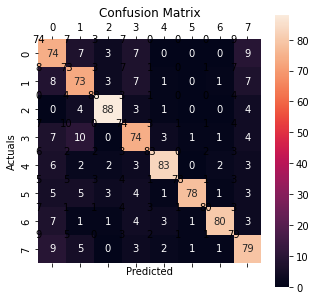

Accuracy : 0.785
precision : 0.785
recall : 0.785
F1 Score : 0.785


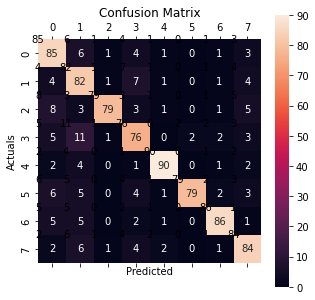

Accuracy : 0.825
precision : 0.825
recall : 0.825
F1 Score : 0.825


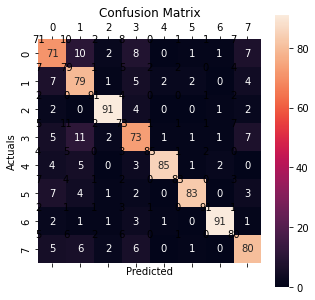

Accuracy : 0.815
precision : 0.815
recall : 0.815
F1 Score : 0.815


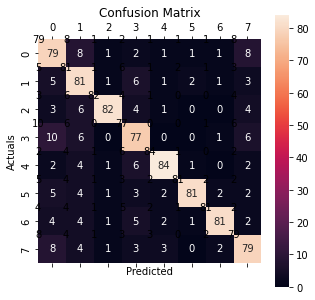

Accuracy : 0.804
precision : 0.804
recall : 0.804
F1 Score : 0.804


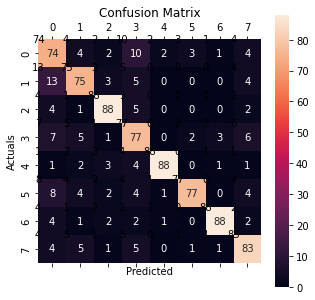

Accuracy : 0.811
precision : 0.811
recall : 0.811
F1 Score : 0.811


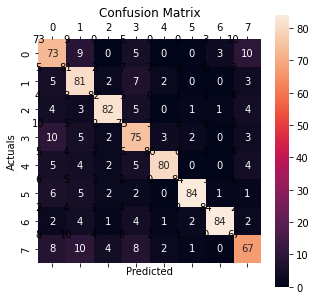

Accuracy : 0.782
precision : 0.782
recall : 0.782
F1 Score : 0.782


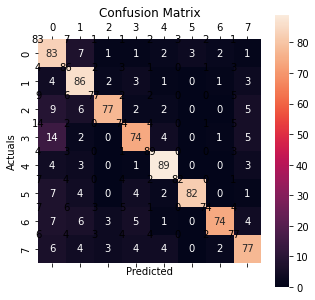

Accuracy : 0.801
precision : 0.801
recall : 0.801
F1 Score : 0.801


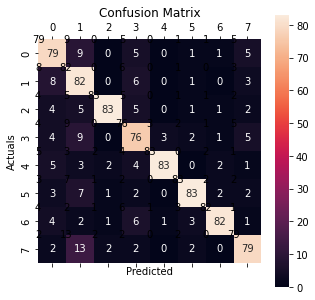

Accuracy : 0.808
precision : 0.808
recall : 0.808
F1 Score : 0.808


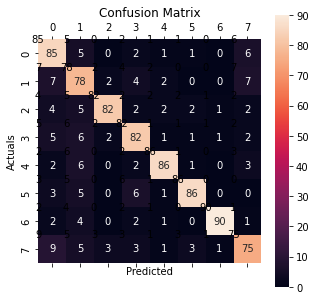

Accuracy : 0.829
precision : 0.829
recall : 0.829
F1 Score : 0.829


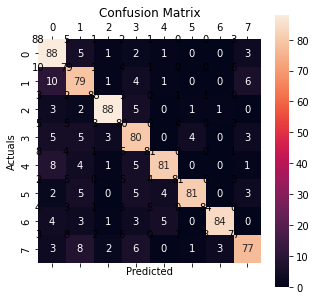

Accuracy : 0.821
precision : 0.821
recall : 0.821
F1 Score : 0.821
0.8082397003745319


In [35]:
sss = StratifiedShuffleSplit(n_splits=10, test_size = 0.1, random_state = None)

counter = 0
accuracy_score = []
for train_index, test_index in sss.split(df, Y) :
    counter += 1
    #print(train_index,test_index)
    X_train, X_test = df.iloc[train_index,:], df.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    #print(X_train.shape, Y_train.shape)
    randf_classifier = RandomForestClassifier(n_estimators = 40)
    randf_classifier.fit(X_train,Y_train)
    
    
    
    y_test_predicted = randf_classifier.predict(X_test)
    conf_matrix = confusion_matrix(Y_test, y_test_predicted)
    fig, ax = plt.subplots(figsize= (5,5))
    ax.matshow(conf_matrix, cmap = plt.cm.Oranges, alpha = 0.3)
    for i in range(conf_matrix.shape[0]) :
        for j in range(conf_matrix.shape[1]) :
            ax.text(x =j, y = i, s = conf_matrix[i, j], va ='center', ha = 'center')
    sns.heatmap(conf_matrix, annot = True)
    plt.xlabel('Predicted')
    plt.ylabel('Actuals')
    plt.title('Confusion Matrix')
    plt.show()
    
   
    print('Accuracy : %0.3f' % randf_classifier.score(X_test,Y_test))
    print('precision : %0.3f' % precision_score(Y_test, y_test_predicted, average='micro'))
    print('recall : %0.3f' % recall_score(Y_test, y_test_predicted, average='micro'))
    print('F1 Score : %0.3f' % f1_score(Y_test, y_test_predicted, average='micro'))
    
    
    accuracy_score.append(randf_classifier.score(X_test,Y_test))

    
    filename = 'D:\\Abhimanyu Singh\\2 knn experiement\\models\\random_forest_classifier'+ str(counter) +'.sav'
    pickle.dump(randf_classifier, open(filename, 'wb'))

print(mean(accuracy_score))  

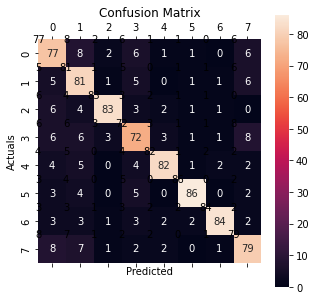

Accuracy : 0.804
precision : 0.804
recall : 0.804
F1 Score : 0.804


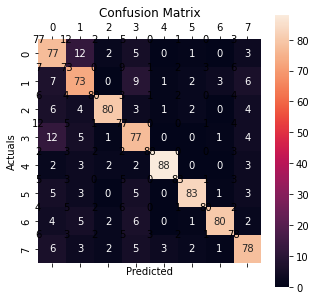

Accuracy : 0.794
precision : 0.794
recall : 0.794
F1 Score : 0.794


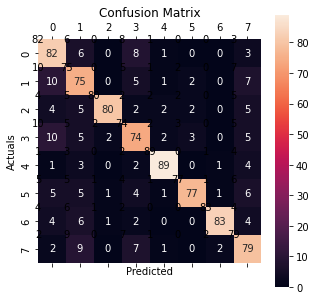

Accuracy : 0.798
precision : 0.798
recall : 0.798
F1 Score : 0.798


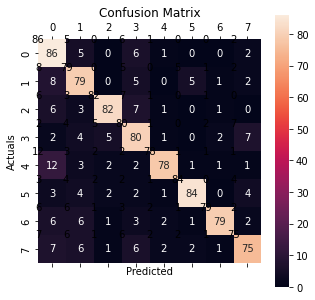

Accuracy : 0.803
precision : 0.803
recall : 0.803
F1 Score : 0.803


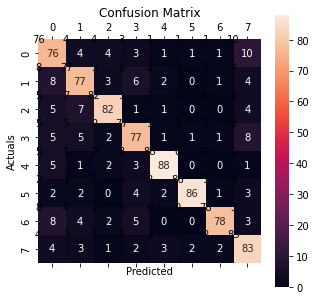

Accuracy : 0.808
precision : 0.808
recall : 0.808
F1 Score : 0.808


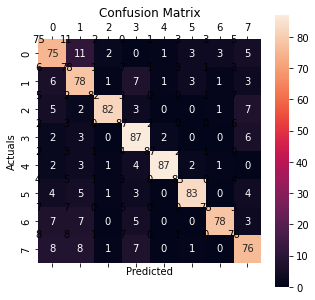

Accuracy : 0.806
precision : 0.806
recall : 0.806
F1 Score : 0.806


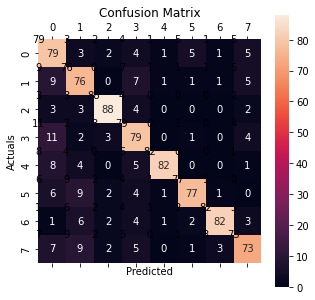

Accuracy : 0.794
precision : 0.794
recall : 0.794
F1 Score : 0.794


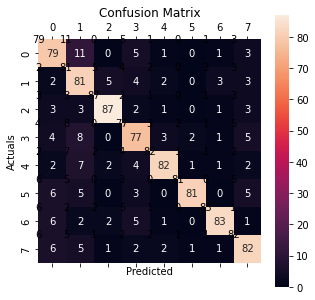

Accuracy : 0.814
precision : 0.814
recall : 0.814
F1 Score : 0.814


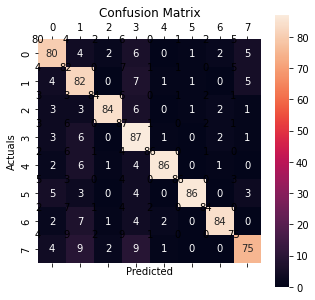

Accuracy : 0.829
precision : 0.829
recall : 0.829
F1 Score : 0.829


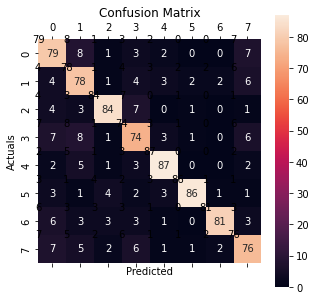

Accuracy : 0.805
precision : 0.805
recall : 0.805
F1 Score : 0.805
0.8054931335830212


In [36]:
sss = StratifiedShuffleSplit(n_splits=10, test_size = 0.1, random_state = None)

counter = 0
accuracy_score = []
for train_index, test_index in sss.split(df, Y) :
    counter += 1
    #print(train_index,test_index)
    X_train, X_test = df.iloc[train_index,:], df.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    #print(X_train.shape, Y_train.shape)
    randf_classifier = RandomForestClassifier(n_estimators = 80)
    randf_classifier.fit(X_train,Y_train)
    
    
    
    y_test_predicted = randf_classifier.predict(X_test)
    conf_matrix = confusion_matrix(Y_test, y_test_predicted)
    fig, ax = plt.subplots(figsize= (5,5))
    ax.matshow(conf_matrix, cmap = plt.cm.Oranges, alpha = 0.3)
    for i in range(conf_matrix.shape[0]) :
        for j in range(conf_matrix.shape[1]) :
            ax.text(x =j, y = i, s = conf_matrix[i, j], va ='center', ha = 'center')
    sns.heatmap(conf_matrix, annot = True)
    plt.xlabel('Predicted')
    plt.ylabel('Actuals')
    plt.title('Confusion Matrix')
    plt.show()
    
   
    print('Accuracy : %0.3f' % randf_classifier.score(X_test,Y_test))
    print('precision : %0.3f' % precision_score(Y_test, y_test_predicted, average='micro'))
    print('recall : %0.3f' % recall_score(Y_test, y_test_predicted, average='micro'))
    print('F1 Score : %0.3f' % f1_score(Y_test, y_test_predicted, average='micro'))
    
    
    accuracy_score.append(randf_classifier.score(X_test,Y_test))

    
    filename = 'D:\\Abhimanyu Singh\\2 knn experiement\\models\\random_forest_classifier'+ str(counter) +'.sav'
    pickle.dump(randf_classifier, open(filename, 'wb'))

print(mean(accuracy_score))  

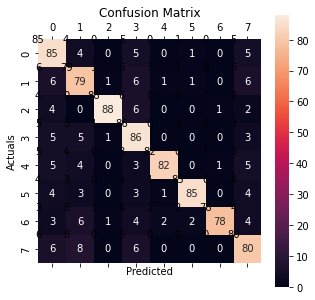

Accuracy : 0.828
precision : 0.828
recall : 0.828
F1 Score : 0.828


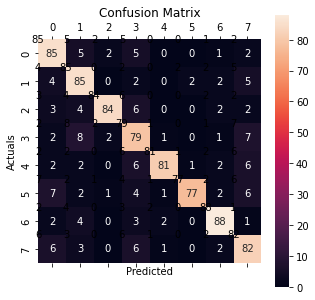

Accuracy : 0.825
precision : 0.825
recall : 0.825
F1 Score : 0.825


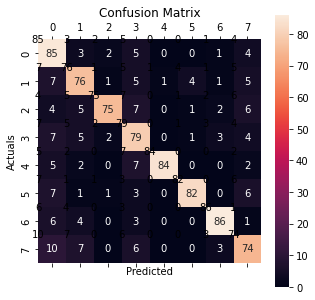

Accuracy : 0.800
precision : 0.800
recall : 0.800
F1 Score : 0.800


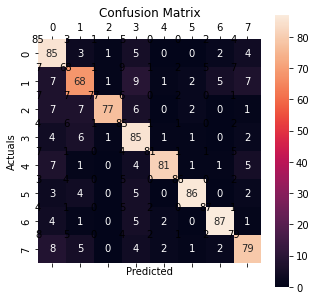

Accuracy : 0.809
precision : 0.809
recall : 0.809
F1 Score : 0.809


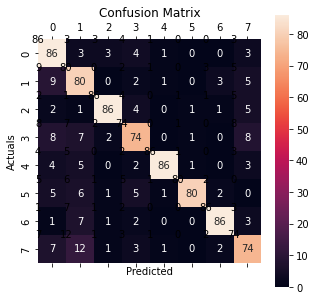

Accuracy : 0.814
precision : 0.814
recall : 0.814
F1 Score : 0.814


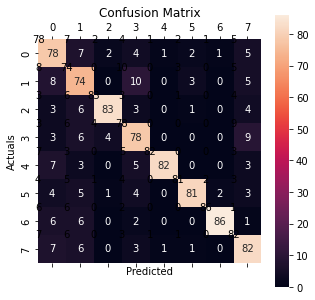

Accuracy : 0.804
precision : 0.804
recall : 0.804
F1 Score : 0.804


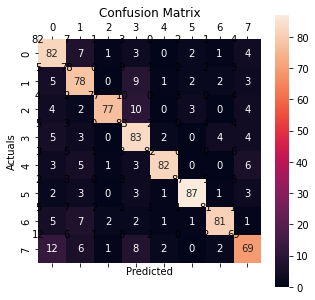

Accuracy : 0.798
precision : 0.798
recall : 0.798
F1 Score : 0.798


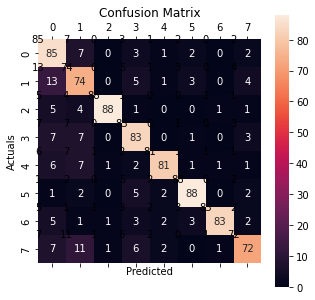

Accuracy : 0.816
precision : 0.816
recall : 0.816
F1 Score : 0.816


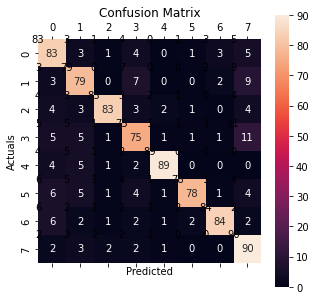

Accuracy : 0.825
precision : 0.825
recall : 0.825
F1 Score : 0.825


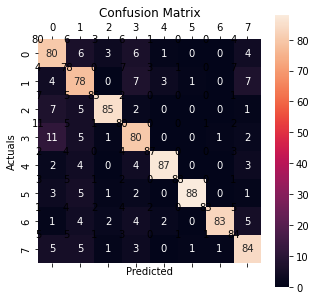

Accuracy : 0.830
precision : 0.830
recall : 0.830
F1 Score : 0.830
0.8149812734082397


In [50]:
sss = StratifiedShuffleSplit(n_splits=10, test_size = 0.1, random_state = None)

counter = 0
accuracy_score = []
for train_index, test_index in sss.split(df, Y) :
    counter += 1
    #print(train_index,test_index)
    X_train, X_test = df.iloc[train_index,:], df.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    #print(X_train.shape, Y_train.shape)
    randf_classifier = RandomForestClassifier(n_estimators = 150)
    randf_classifier.fit(X_train,Y_train)
    
    
    
    y_test_predicted = randf_classifier.predict(X_test)
    conf_matrix = confusion_matrix(Y_test, y_test_predicted)
    fig, ax = plt.subplots(figsize= (5,5))
    ax.matshow(conf_matrix, cmap = plt.cm.Oranges, alpha = 0.3)
    for i in range(conf_matrix.shape[0]) :
        for j in range(conf_matrix.shape[1]) :
            ax.text(x =j, y = i, s = conf_matrix[i, j], va ='center', ha = 'center')
    sns.heatmap(conf_matrix, annot = True)
    plt.xlabel('Predicted')
    plt.ylabel('Actuals')
    plt.title('Confusion Matrix')
    plt.show()
    
   
    print('Accuracy : %0.3f' % randf_classifier.score(X_test,Y_test))
    print('precision : %0.3f' % precision_score(Y_test, y_test_predicted, average='micro'))
    print('recall : %0.3f' % recall_score(Y_test, y_test_predicted, average='micro'))
    print('F1 Score : %0.3f' % f1_score(Y_test, y_test_predicted, average='micro'))
    
    
    accuracy_score.append(randf_classifier.score(X_test,Y_test))

    
    filename = 'D:\\Abhimanyu Singh\\2 knn experiement\\models\\random_forest_classifier'+ str(counter) +'.sav'
    pickle.dump(randf_classifier, open(filename, 'wb'))

print(mean(accuracy_score))  

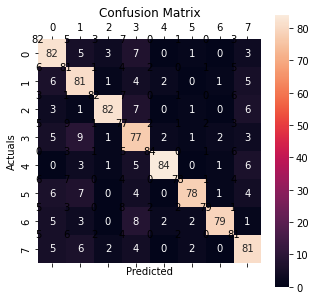

Accuracy : 0.804
precision : 0.804
recall : 0.804
F1 Score : 0.804


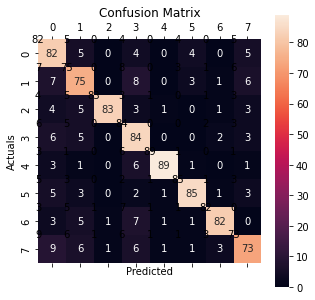

Accuracy : 0.815
precision : 0.815
recall : 0.815
F1 Score : 0.815


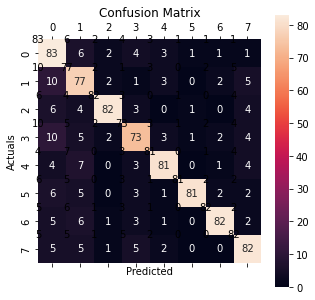

Accuracy : 0.800
precision : 0.800
recall : 0.800
F1 Score : 0.800


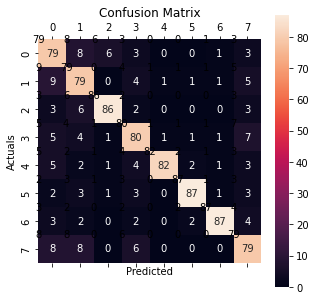

Accuracy : 0.823
precision : 0.823
recall : 0.823
F1 Score : 0.823


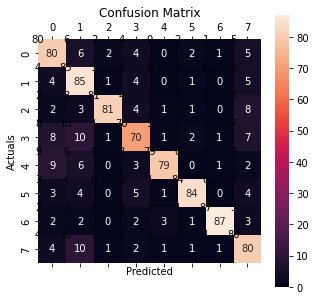

Accuracy : 0.806
precision : 0.806
recall : 0.806
F1 Score : 0.806


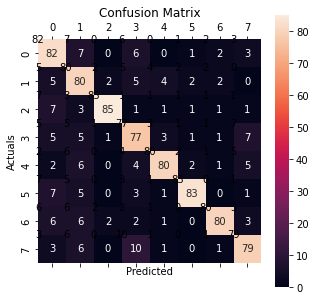

Accuracy : 0.806
precision : 0.806
recall : 0.806
F1 Score : 0.806


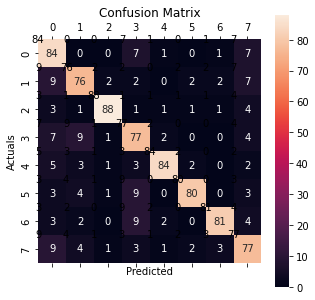

Accuracy : 0.808
precision : 0.808
recall : 0.808
F1 Score : 0.808


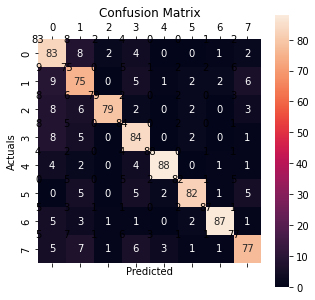

Accuracy : 0.818
precision : 0.818
recall : 0.818
F1 Score : 0.818


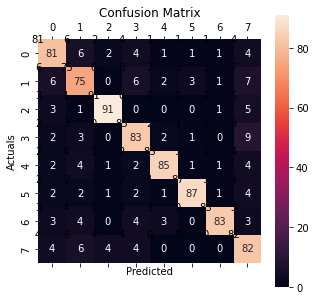

Accuracy : 0.833
precision : 0.833
recall : 0.833
F1 Score : 0.833


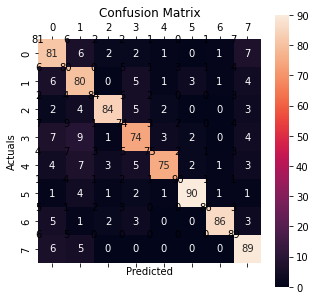

Accuracy : 0.823
precision : 0.823
recall : 0.823
F1 Score : 0.823
0.8136079900124844


In [46]:
from sklearn.ensemble import AdaBoostClassifier
import random
counter = 0
accuracy_score = []
for train_index, test_index in sss.split(df, Y) :
    counter += 1
    #print(train_index,test_index)
    X_train, X_test = df.iloc[train_index,:], df.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    #print(X_train.shape, Y_train.shape)
    rand_state_1 = random.randint(100, 999)
    rand_state_2 = random.randint(100, 999)
    parameters = {
    'n_estimators': [4,8,16,32,64,128,256,512],
    'learning_rate': [(0.097 + x / 100) for x in range(0, 9)],
    'algorithm': ['SAMME', 'SAMME.R']
    }
    adaboost_classifier = AdaBoostClassifier(n_estimators=100, learning_rate =0.98, algorithm = 'SAMME.R' )
    randf_classifier.fit(X_train,Y_train)
    
    
    
    y_test_predicted = randf_classifier.predict(X_test)
    conf_matrix = confusion_matrix(Y_test, y_test_predicted)
    fig, ax = plt.subplots(figsize= (5,5))
    ax.matshow(conf_matrix, cmap = plt.cm.Oranges, alpha = 0.3)
    for i in range(conf_matrix.shape[0]) :
        for j in range(conf_matrix.shape[1]) :
            ax.text(x =j, y = i, s = conf_matrix[i, j], va ='center', ha = 'center')
    sns.heatmap(conf_matrix, annot = True)
    plt.xlabel('Predicted')
    plt.ylabel('Actuals')
    plt.title('Confusion Matrix')
    plt.show()
    
   
    print('Accuracy : %0.3f' % randf_classifier.score(X_test,Y_test))
    print('precision : %0.3f' % precision_score(Y_test, y_test_predicted, average='micro'))
    print('recall : %0.3f' % recall_score(Y_test, y_test_predicted, average='micro'))
    print('F1 Score : %0.3f' % f1_score(Y_test, y_test_predicted, average='micro'))
    
    
    accuracy_score.append(randf_classifier.score(X_test,Y_test))

    
    filename = 'D:\\Abhimanyu Singh\\2 knn experiement\\models\\random_forest_classifier'+ str(counter) +'.sav'
    pickle.dump(randf_classifier, open(filename, 'wb'))

print(mean(accuracy_score))  

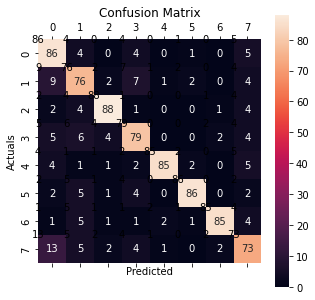

Accuracy : 0.821
precision : 0.821
recall : 0.821
F1 Score : 0.821


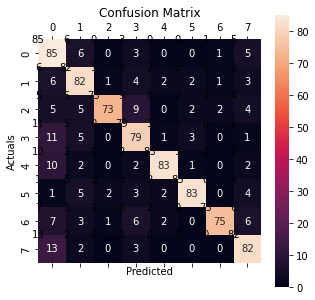

Accuracy : 0.801
precision : 0.801
recall : 0.801
F1 Score : 0.801


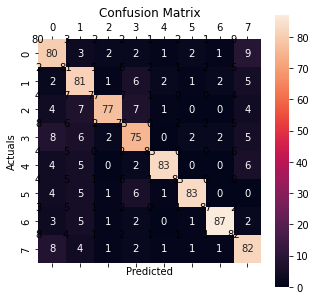

Accuracy : 0.809
precision : 0.809
recall : 0.809
F1 Score : 0.809


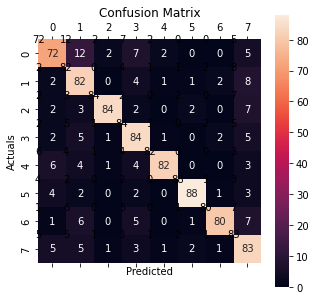

Accuracy : 0.818
precision : 0.818
recall : 0.818
F1 Score : 0.818


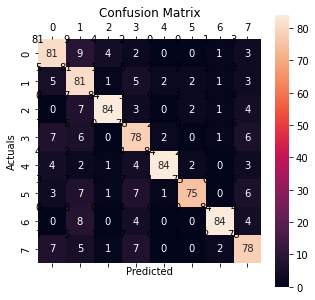

Accuracy : 0.805
precision : 0.805
recall : 0.805
F1 Score : 0.805


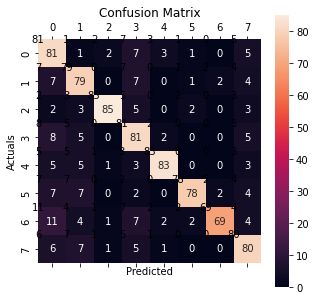

Accuracy : 0.794
precision : 0.794
recall : 0.794
F1 Score : 0.794


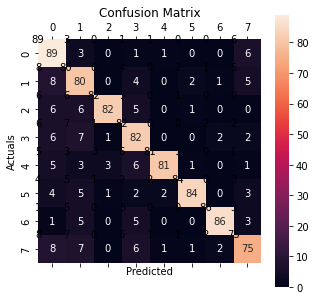

Accuracy : 0.823
precision : 0.823
recall : 0.823
F1 Score : 0.823


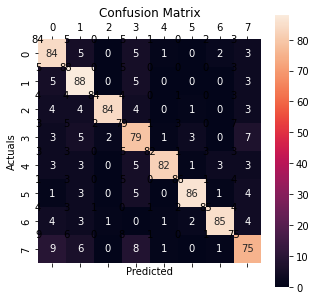

Accuracy : 0.828
precision : 0.828
recall : 0.828
F1 Score : 0.828


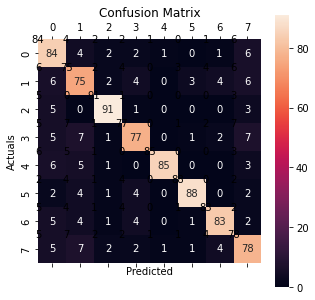

Accuracy : 0.825
precision : 0.825
recall : 0.825
F1 Score : 0.825


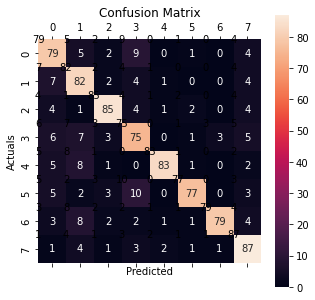

Accuracy : 0.808
precision : 0.808
recall : 0.808
F1 Score : 0.808
0.8132334581772784


In [49]:
from sklearn.ensemble import AdaBoostClassifier
import random
from sklearn.linear_model import SGDClassifier
counter = 0
accuracy_score = []
for train_index, test_index in sss.split(df, Y) :
    counter += 1
    #print(train_index,test_index)
    X_train, X_test = df.iloc[train_index,:], df.iloc[test_index,:]
    Y_train, Y_test = Y[train_index], Y[test_index]
    #print(X_train.shape, Y_train.shape)
    rand_state_1 = random.randint(100, 999)
    rand_state_2 = random.randint(100, 999)
    parameters = {
    'n_estimators': [4,8,16,32,64,128,256,512],
    'learning_rate': [(0.097 + x / 100) for x in range(0, 9)],
    'algorithm': ['SAMME', 'SAMME.R']
    }
    adaboost_classifier = AdaBoostClassifier(SGDClassifier(loss='hinge'),n_estimators=100, learning_rate =0.98, algorithm = 'SAMME.R' )
    randf_classifier.fit(X_train,Y_train)
    
    
    
    y_test_predicted = randf_classifier.predict(X_test)
    conf_matrix = confusion_matrix(Y_test, y_test_predicted)
    fig, ax = plt.subplots(figsize= (5,5))
    ax.matshow(conf_matrix, cmap = plt.cm.Oranges, alpha = 0.3)
    for i in range(conf_matrix.shape[0]) :
        for j in range(conf_matrix.shape[1]) :
            ax.text(x =j, y = i, s = conf_matrix[i, j], va ='center', ha = 'center')
    sns.heatmap(conf_matrix, annot = True)
    plt.xlabel('Predicted')
    plt.ylabel('Actuals')
    plt.title('Confusion Matrix')
    plt.show()
    
   
    print('Accuracy : %0.3f' % randf_classifier.score(X_test,Y_test))
    print('precision : %0.3f' % precision_score(Y_test, y_test_predicted, average='micro'))
    print('recall : %0.3f' % recall_score(Y_test, y_test_predicted, average='micro'))
    print('F1 Score : %0.3f' % f1_score(Y_test, y_test_predicted, average='micro'))
    
    
    accuracy_score.append(randf_classifier.score(X_test,Y_test))

    
    filename = 'D:\\Abhimanyu Singh\\2 knn experiement\\models\\random_forest_classifier'+ str(counter) +'.sav'
    pickle.dump(randf_classifier, open(filename, 'wb'))

print(mean(accuracy_score))  